In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.preprocessing import StandardScaler, LabelEncoder
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score, roc_curve, auc
from sklearn.model_selection import cross_val_score, GridSearchCV

In [ ]:
# installation of openpyxl
!pip install openpyxl

In [7]:
# Load the dataset
df = pd.read_excel('Pumpkin_Seeds_Dataset.xlsx')
df.head()

,Area,Perimeter,Major_Axis_Length,Minor_Axis_Length,Convex_Area,Equiv_Diameter,Eccentricity,Solidity,Extent,Roundness,Aspect_Ration,Compactness,Class
0,56276,888.242,326.1485,220.2388,56831,267.6805,0.7376,0.9902,0.7453,0.8963,1.4809,0.8207,Çerçevelik
1,76631,1068.146,417.1932,234.2289,77280,312.3614,0.8275,0.9916,0.7151,0.8440,1.7811,0.7487,Çerçevelik
2,71623,1082.987,435.8328,211.0457,72663,301.9822,0.8749,0.9857,0.7400,0.7674,2.0651,0.6929,Çerçevelik
3,66458,992.051,381.5638,222.5322,67118,290.8899,0.8123,0.9902,0.7396,0.8486,1.7146,0.7624,Çerçevelik
4,66107,998.146,383.8883,220.4545,67117,290.1207,0.8187,0.9850,0.6752,0.8338,1.7413,0.7557,Çerçevelik


In [ ]:
# Display basic information about the dataset

# See the first few rows
print("First look at our data:")
print(data.head())

# Check how many of each type
print("\nTypes of pumpkin seeds:")
print(data['Class'].value_counts())

In [ ]:
# compare seed sizes
plt.figure(figsize=(10, 6))
sns.boxplot(x='Class', y='Area', data=data)
plt.title('Seed Area Comparison')
plt.xlabel('Seed Type')
plt.ylabel('Area (pixels)')
plt.show()

In [ ]:
# Convert seed types to numbers (0 and 1)
le = LabelEncoder()
data['Class_number'] = le.fit_transform(data['Class'])



In [ ]:
# Prepare features (measurements) and target (seed type)
X = data.drop(['Class', 'Class_number'], axis=1)  # All measurements
y = data['Class_number']  # Seed type (0 or 1)

In [ ]:
# Scale the measurements (make them same size)
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [ ]:
# Split data: 80% for training, 20% for testing
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, y, test_size=0.2, random_state=42
)

Model trained.


In [ ]:

# train our model
model = LogisticRegression()
model.fit(X_train, y_train)

print("Model trained.")

In [ ]:

# Make predictions
predictions = model.predict(X_test)

In [ ]:
# Calculate accuracy
from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, predictions)
print(f"Model Accuracy: {accuracy:.2%}")

In [34]:
# features that are most important
feature_importance = pd.DataFrame({
    'Feature': data.drop(['Class', 'Class_number'], axis=1).columns,
    'Importance': abs(model.coef_[0])
}).sort_values('Importance', ascending=False)

print("Most important features:")
print(feature_importance.head(5))

Most important features:
           Feature  Importance
0             Area    2.195285
4      Convex_Area    2.018938
5   Equiv_Diameter    1.999467
11     Compactness    1.916455
10   Aspect_Ration    1.893158


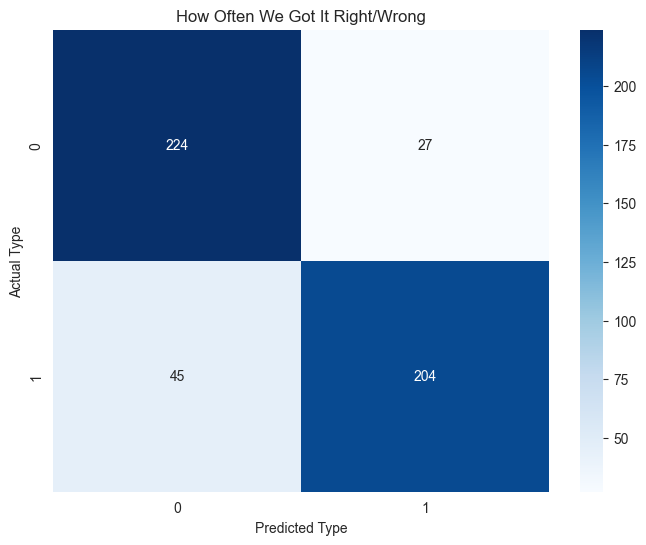

In [35]:

# Create confusion matrix
cm = confusion_matrix(y_test, predictions)

# Plot it
plt.figure(figsize=(8, 6))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.title('How Often We Got It Right/Wrong')
plt.xlabel('Predicted Type')
plt.ylabel('Actual Type')
plt.show()

#### Real-World Use
This modeling could help farmers automatically sort seeds, quality control in factories, or help scientists study seed characteristics!